# Questions

- Can you help me figure out what the errors on my data scraping is? (Don't have much experience with asyncio)
- How much data (number of images) should I input to the neural network at a time.
- How to split data into training, validation, and testing set. (Practical vs. Typical)
- How to improve accuracy of OCR? Is it a simple fix or does it require research on tuning OCR [this article](https://tesseract-ocr.github.io/tessdoc/ImproveQuality)
- Importing issues with cv2, Tensorflow, and BERT
- Which BERT model is best?

suppply new font module for pytesseract

Could opt to only use pages with OCR text

Google Drive is better

Different pathways (one for image array, working in parallel. Then flatten and concatenate them.

Pipeline for single image at first. Then possibly extrapolate to multiple images in a single pipeline.

Use distil-BERT from discussion because it will be fastest. But, we're welcome to experiment with other ones.

If transfer learning isn't working too well, prob better just to make a new network.

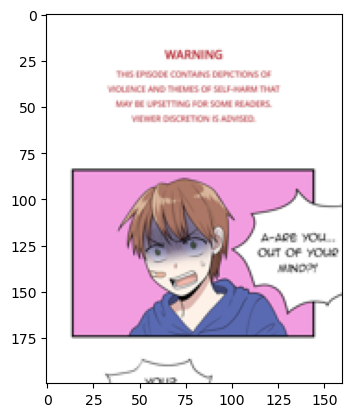

WARNING

THIS EPISODE CONTAINS DEPICTIONS OF
VIOLENCE AND THEMES OF SELF-HARM THAT
MAY BE UPSETTING FOR SOME READERS.
VIEWER DISCRETION IS ADVISED.

A-ARE YOU...
OuT Of YOouR
MIND?!


In [11]:
# ocr and image preprocessing testing on individual image

from PIL import Image
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

pytesseract.pytesseract.tesseract_cmd = r'/opt/local/bin/tesseract'

image = Image.open('images_testing/Drama/1630348231776306414.jpg')
text = pytesseract.image_to_string( image )
image = image.resize((160,200))
img_arr = np.array(image)
plt.imshow(img_arr)
plt.show()
print(text.strip())

In [ ]:
# Unzips zip file

from zipfile import ZipFile

opened_zip = ZipFile('images_testing.zip') # PATH to training_data.zip
opened_zip.extractall()

Image 0 - Romance


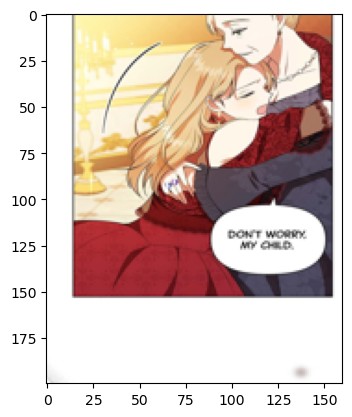

OCR Read: 
Image 1 - Romance


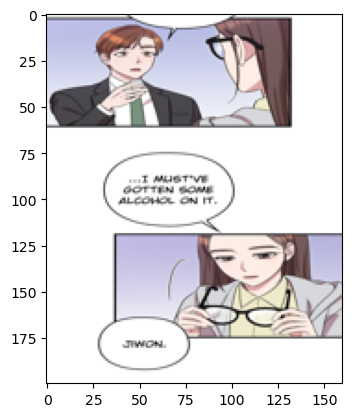

OCR Read: 
Image 2 - Romance


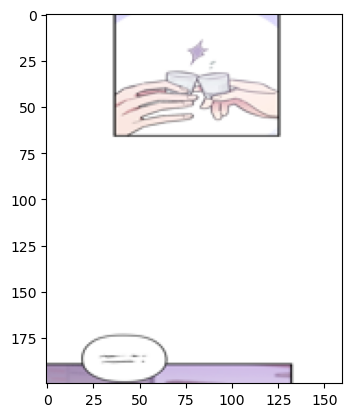

OCR Read: 
Image 3 - Romance


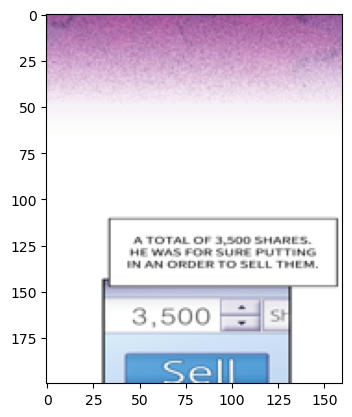

OCR Read: ATOTAL OF 3,500 SHARES.
HE WAS FOR SURE PUTTING
IN AN ORDER TO SELL THEM.
Image 4 - Romance


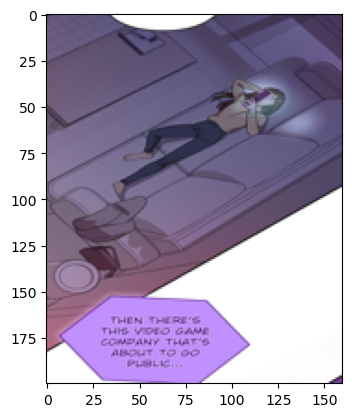

OCR Read: =

THEN THERE'S
THIS VIDEO GAME
COMPANY THAT'S
ABOUT TO GO
PUBLIC...
Image 5 - Drama


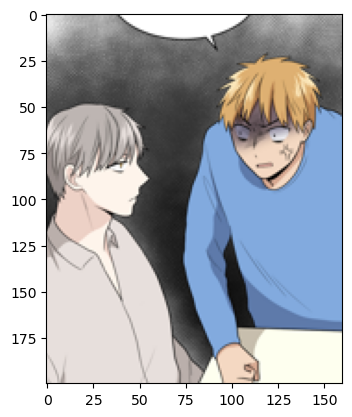

OCR Read: 
Image 6 - Drama


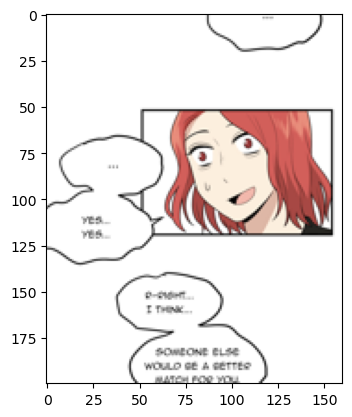

OCR Read: R-RIGHT...
T THINK...

SOMEONE ELSE
WOULD 8E A BETTER
MATCH EOC YOUI
Image 7 - Drama


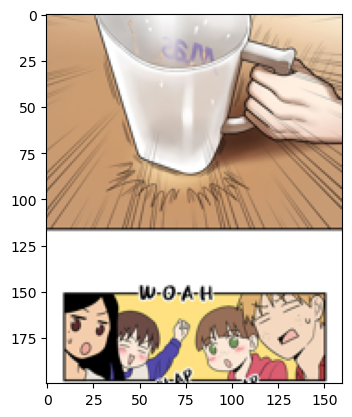

OCR Read: 
Image 8 - Drama


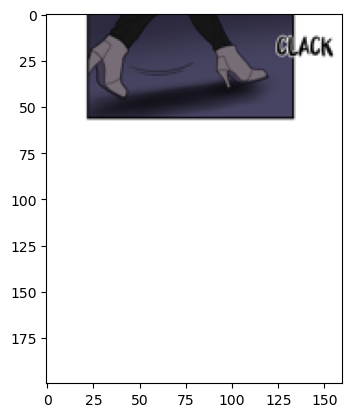

OCR Read: CLACK
Image 9 - Drama


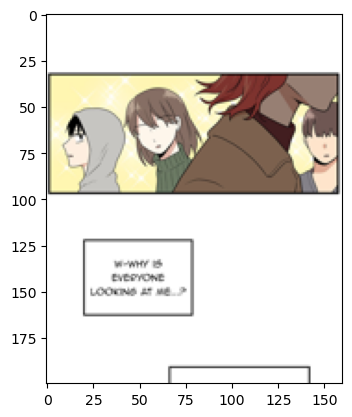

OCR Read: W-WHY 1S
EVERYONE
LOOKING AT ME...?


In [13]:
# Testing OCR and image vectorizing on stored images

import os
from PIL import Image
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

pytesseract.pytesseract.tesseract_cmd = r'/opt/local/bin/tesseract'

img_testing_data = []
text_testing_data = []
genre_testing_data = []

Path = 'images_testing'
for genre in os.listdir(Path):
    if genre == '.DS_Store':
        continue
    path = os.path.join(Path, genre)
    for images in os.listdir(path)[:5]:
        path1 = os.path.join(path,images)
        image = Image.open(path1)
        text_testing_data.append(pytesseract.image_to_string(image).strip())
        genre_testing_data.append(genre)
        image = image.resize((160,200))
        img_testing_data.append(np.array(image))
        
        
for i in range(10):
    print(f"Image {i} - {genre_testing_data[i]}")
    plt.imshow(img_testing_data[i])
    plt.show()
    print(f"OCR Read: {text_testing_data[i]}")

In [14]:
np.save('img_testing_arr', np.array(img_testing_data, dtype='object'))
np.save('text_testing_arr', np.array(text_testing_data))
np.save('genre_testing_arr', np.array(genre_testing_data))

In [ ]:
# Loading text and image data from images folder

import os
from PIL import Image
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import time

pytesseract.pytesseract.tesseract_cmd = r'/opt/local/bin/tesseract'

img_data = []
text_data = []
#genre_data = []

start_time = time.time()

Path = 'images'
for genre in os.listdir(Path):
    img_data = []
    text_data = []
    genre_start_time = time.time()
    if genre == '.DS_Store':
        continue
    path = os.path.join(Path, genre)
    for images in os.listdir(path):
        if images == '.DS_Store':
            continue
        path1 = os.path.join(path,images)
        image = Image.open(path1)
        text_data.append(pytesseract.image_to_string(image).strip())
        #genre_data.append(genre)
        image = image.resize((160,200))
        image = image.convert('RGB')
        img_data.append(np.array(image))
    np.save(f'{genre}_img_arr', np.array(img_data))
    np.save(f'{genre}_text_arr', np.array(text_data))
    print(f"finished {genre} in {time.time()-genre_start_time}")
print(f"finished everything in {time.time()-start_time}")

#np.save('img_arr', np.array(img_data, dtype='object'))
#np.save('text_arr', np.array(text_data))
#np.save('genre_arr', np.array(genre_data))

finished Supernatural in 274.85001516342163


In [39]:
import os
os.listdir('images')

['Supernatural',
 '.DS_Store',
 'Romance',
 'Sci-fi',
 'Heartwarming',
 'Mystery',
 'Comedy',
 'Horror',
 'Sports',
 'Informative',
 'Historical',
 'Action',
 'Slice of life',
 'Thriller',
 'Superhero',
 'Fantasy',
 'Drama']

In [ ]:
# Experimenting with BERT

# This wasn't working for me locally cause installing tensorflow sucks and i couldn't get the transformers package
# to work either

# Code from this article:
# https://medium.com/@manindersingh120996/accelerate-your-text-data-analysis-with-custom-bert-word-embeddings-and-tensorflow-45590cf9c54

import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

bert_model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

encoded_data = tokenizer.batch_encode_plus(text_data, add_special_tokens=True, return_attention_mask=True, return_token_type_ids=False, pad_to_max_length=True)

# What I've Done

- Scraped images from webtoons onto harddrive organizing in images/genre/image_name.jpg format. The images folder is currently 10.15 GB. I can easily gather more data. The only thing holding me back is my computer's spotty connection to wifi, and the wifi speed.
- Stored images as vectors and text as strings in lists associated by index

# Tasks

- Figure out how much data to use at a time for each input.
- Decide how to split data into training, validation, and testing set.
- Improve OCR accuracy with [this article](https://tesseract-ocr.github.io/tessdoc/ImproveQuality)
- Figure out how to use BERT to encode text to vectors.

In [ ]:
# Something we prob won't use

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

img_width, img_height = 224, 224

train_data_dir = 'images'
nb_train_samples =400
epochs = 10
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')